# **Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means Clustering**

In this brief project, adapted from [DataCamp](https://app.datacamp.com/learn/projects/1809), I utilize an unsupervised learning model (K - means clustering) to cluster penguins dataset species.



$\,$

First, I will import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

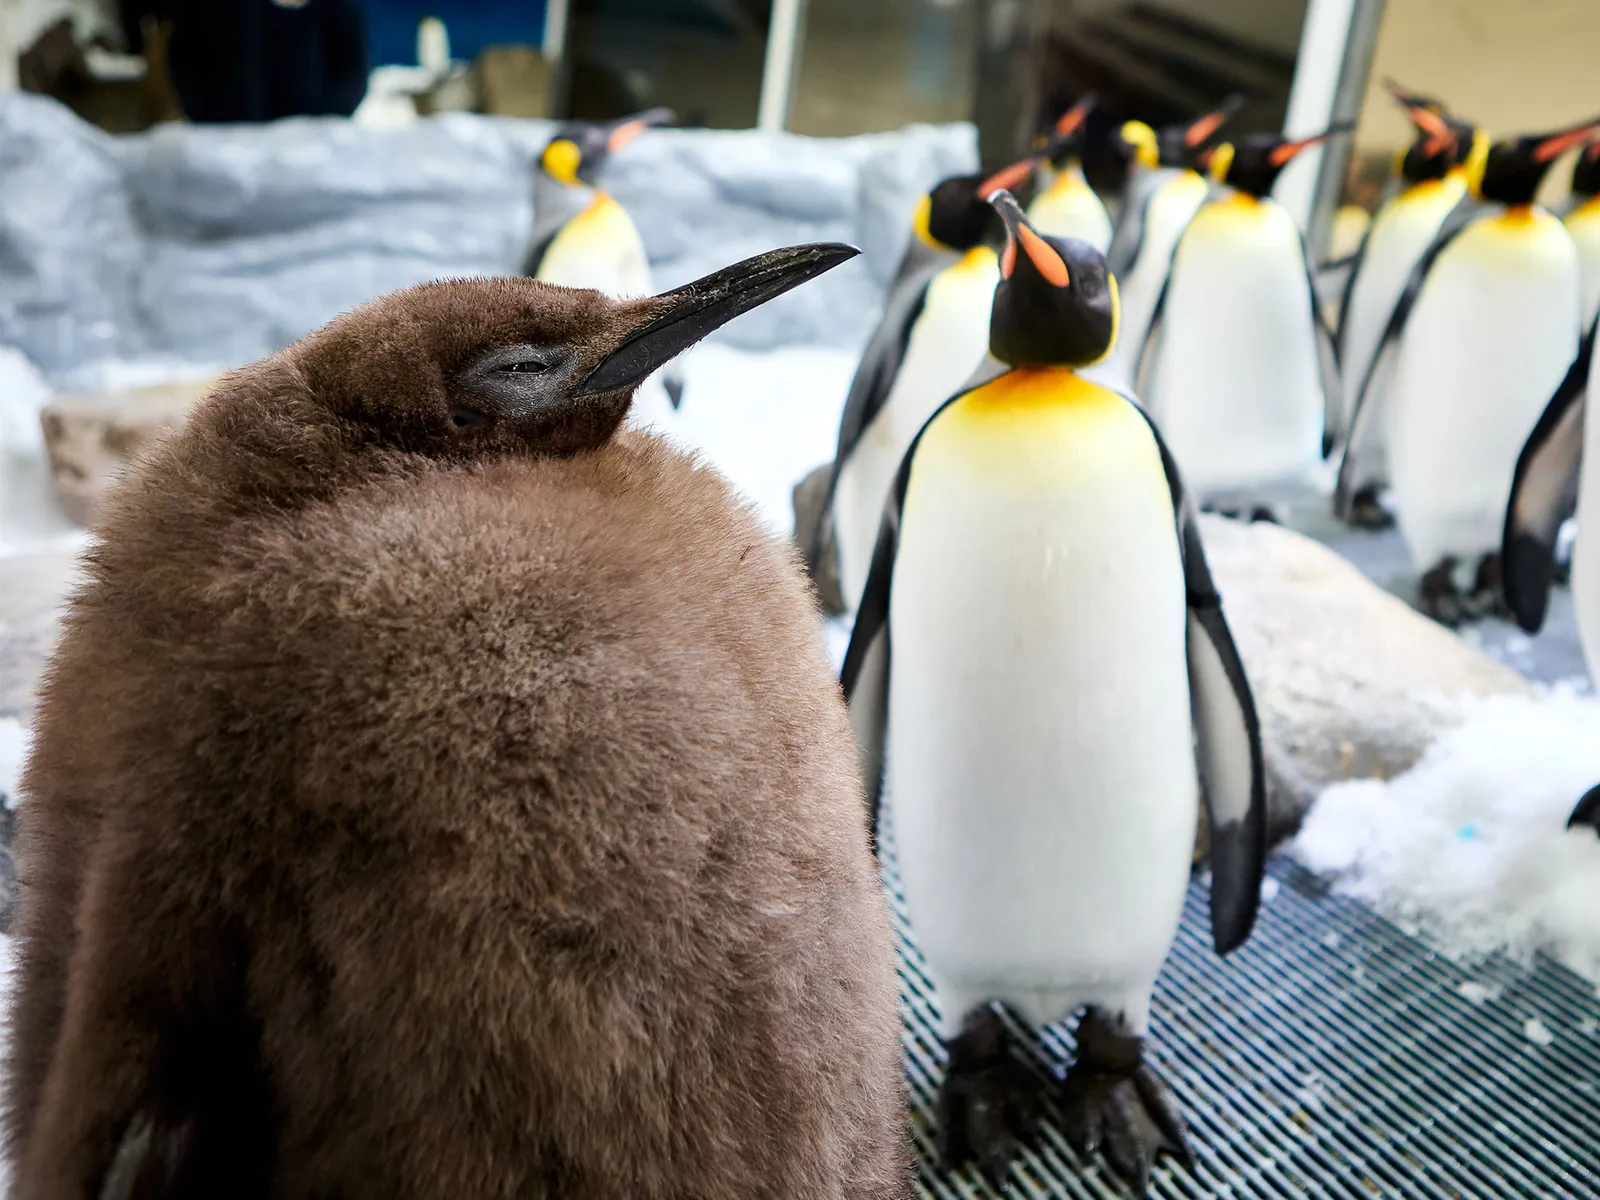


$\,$

Basically, I have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as penguins.csv

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

$\,$

Unfortunately, they have not been able to record the species of penguin, but they know that there are at least three species that are native to the region: Adelie, Chinstrap, and Gentoo. My task is to apply my impeccable data science skills to help them identify groups in the dataset!

We can do this, let's go!

In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [ ]:

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [ ]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


In [ ]:

# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


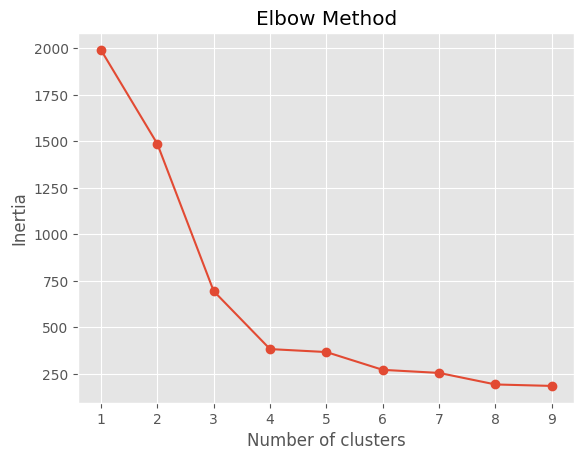

In [ ]:
# Step 4 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

n_clusters = 4

# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

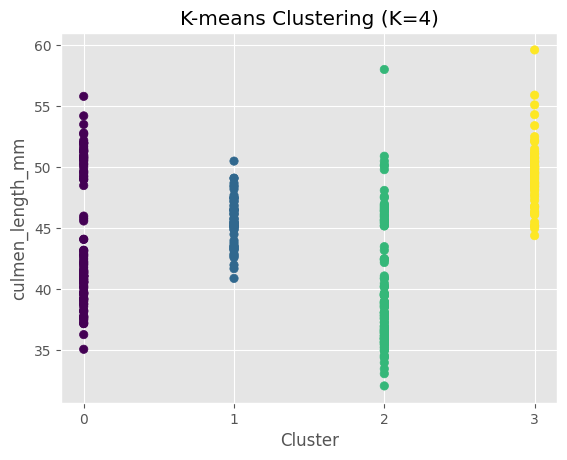

In [ ]:
# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

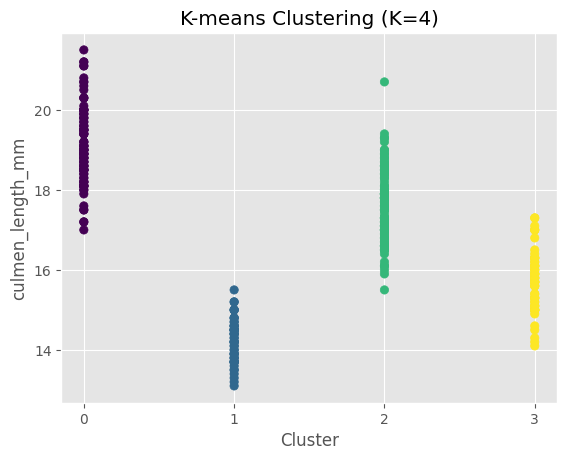

In [ ]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

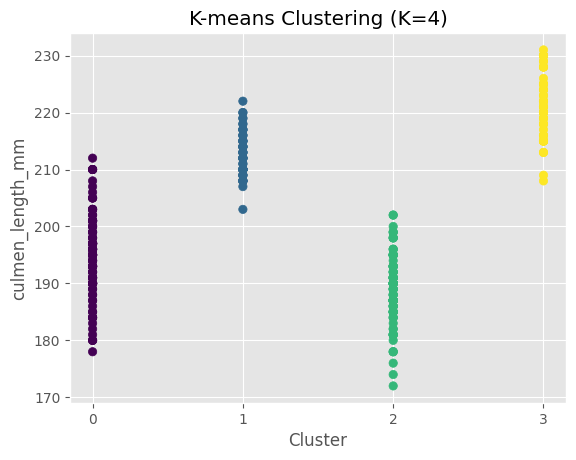

In [ ]:
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['flipper_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [ ]:
# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984


In [ ]:
# The End !!